# Data Load

In previous notebook, we already saved the `df_to_number` function to change the data into numerical representations. Also, in popularity predictions, we don't need `genre`, `artist_name`, `track_name`, and `track_id` so we can drop them as well. 

In [24]:
from script import preprocessing as pre
from script import visualization as sv
import pandas as pd 
data = pre.df_to_number(pd.read_csv('data/SpotifyFeatures.csv').drop(columns=['artist_name', 'track_name', 'track_id', 'genre']))
data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0,0.611,0.389,99373,0.910,0.000,2,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,1,0.246,0.590,137373,0.737,0.000,7,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,3,0.952,0.663,170267,0.131,0.000,1,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,0,0.703,0.240,152427,0.326,0.000,2,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,4,0.950,0.331,82625,0.225,0.123,6,0.2020,-21.150,1,0.0456,140.576,4,0.390


# Data Preparation

In previous notebook, we have already pair-plotted each feature and got its scatter and correlation heatmap. Let's take a look once again, and do a feature drop. 

![](res/pairplot.png)

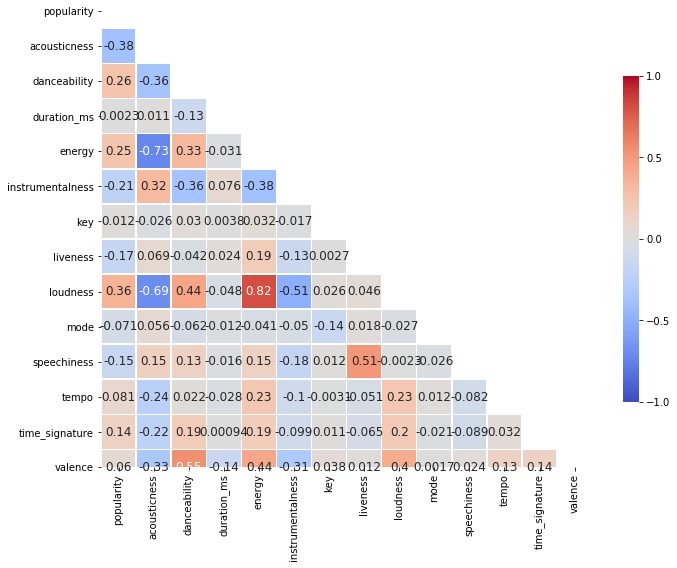

In [25]:
sv.corr_heatmap(data)

But, let's not hurry. We will drop the features later using different measurement than what we've done in classification case before. 

# Data Preparation

The dataset contains multi-labeled data, wich one song might be labeled in different genre. This is a problem to previous notebook where we wanted to classify song's genre by its feature. In this case, we don't need to worry about this since those duplicates have the same popularity. See the example below 

In [26]:
_data = pd.read_csv('data/SpotifyFeatures.csv')
duplicated_all = _data[_data.duplicated(subset = 'track_id', keep=False)]
duplicated = _data[_data.duplicated(subset = 'track_id', keep='first')]
_data[_data['track_id'] == duplicated['track_id'].iloc[0]]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
77710,Children’s Music,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
93651,Indie,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
113770,Pop,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7


Now, let's split the dataset into train and validation set

In [27]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['popularity'])
y = data['popularity']
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2)

In [28]:
print(f"""Training size: x= {X_train.shape}\t y={y_train.shape}
Validation size: x= {X_valid.shape}\t y={y_valid.shape}
""")

Training size: x= (186180, 13)	 y=(186180,)
Validation size: x= (46545, 13)	 y=(46545,)



# Modelling

## Linear Regression

We are new to data science and machine learning. And linear regression is the very basic model we should master due to its high interpretability. Previously we used sklearn, we will now try to use statsmodels since it gives more details about the statistical measurements in such an easy way.

In [29]:
import statsmodels.api as sm # import statsmodels 

X_train = sm.add_constant(X_train) ## let's add an intercept (beta_0) to our model
X_valid = sm.add_constant(X_valid)

# Note the difference in argument order
model = sm.OLS(y_train, X_train).fit() ## sm.OLS(output, input)

C:\Users\dzul\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
# from sklearn.linear_model import LinearRegression
# slr = LinearRegression() # Simple Lnear Regressor
# slr.fit(X_train, y_train)

# Evaluation

In [31]:
predictions = model.predict(X_valid)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     4469.
Date:                Wed, 18 Dec 2019   Prob (F-statistic):               0.00
Time:                        13:49:52   Log-Likelihood:            -7.7908e+05
No. Observations:              186180   AIC:                         1.558e+06
Df Residuals:                  186166   BIC:                         1.558e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               52.4299      0.501    104.746      0.000      51.449      53.411
acousticness       -11.6815      0.173    -67.493      0.000     -12.021     -11.342
danceability        16.9216      0.272     62.155      0.000      16.388      17.455
duration_ms       2.307e-06   3.12e-07      7.404      0.000     1.7e-06    2.92e-06
energy              -5.9590      0.312    -19.110      0.000      -6.570      -5.348
instrumentalness    -4.5829      0.149    -30.724      0.000      -4.875      -4.291
key                 -0.0137      0.010     -1.309      0.190      -0.034       0.007
liveness            -9.4497      0.225    -42.073      0.000      -9.890      -9.010
loudness             0.7146      0.013     56.945      0.000       0.690       0.739
mode                -1.8314      0.079    -23.258      0.000      -1.986      -1.677
speechiness         -8.2516      0.257    -32.077      0.000      -8.756      -7.747
tempo               -0.0037      0.001     -2.977      0.003      -0.006      -0.001
time_signature       1.2190      0.082     14.781      0.000       1.057       1.381
valence            -13.1510      0.185    -70.959      0.000     -13.514     -12.788
==============================================================================
Omnibus:                     3209.255   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3372.766
Skew:                          -0.328   Prob(JB):                         0.00
Kurtosis:                       2.936   Cond. No.                     4.03e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From model's summary above, we can interpret several parameters:

1. Adjusted R-squared measures the model's performance. The values range from 0 to 1, higher is better. R-squared measures how our variables can explain the target variable (based on variance). Using our predictor, it could only explian ~20% of the song's popularity. 
 
2. const coefficient is Y-intercept. It means that if all the predictor's coefficient or value are zero, the expected popularity is this value. 

5. std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy

6. P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant. One of our preditor, `key`, has the value of 0.351 wich is considered insignifficant. We can drop this later. 

7. Confidence Interval ( see the `[0.025 0.975]` column) represents the range in which our coefficients are likely to fall (with a likelihood of 2.5% or 97.5%)

Another most popular metric to measure regression model's performance is error.

In [32]:
import numpy as np
y_valid_pred = model.predict(X_valid)
import sklearn 
from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE
error = y_valid_pred-y_valid
print(f"""MAE\t: {MAE(y_valid, y_valid_pred)}
MSE\t: {MSE(y_valid, y_valid_pred)}
RMSE\t: {np.sqrt(MSE(y_valid, y_valid_pred))}
""")

MAE	: 12.662599658845247
MSE	: 252.430727728119
RMSE	: 15.888068722413022



In [33]:
validation = X_valid.drop(columns='const')
validation['error'] = error 
validation['popularity'] = y_valid
validation['^popularity'] = y_valid_pred
validation.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,error,popularity,^popularity
227948,0.38100,0.665,243794,0.369,0.914000,1,0.1080,-16.111,1,0.0483,100.015,4,0.0335,-5.306237,48,42.693763
22302,0.00314,0.580,182400,0.940,0.042600,3,0.1130,-3.038,1,0.5670,149.990,4,0.3620,-10.399667,57,46.600333
75702,0.11100,0.714,156907,0.545,0.000000,12,0.0814,-12.448,0,0.1360,139.942,4,0.8020,43.187886,0,43.187886
184085,0.97700,0.348,91093,0.218,0.000458,2,0.1120,-11.339,1,0.0395,93.740,3,0.2560,23.411036,11,34.411036
219400,0.05460,0.568,239328,0.614,0.000000,10,0.3390,-7.743,1,0.0325,117.950,4,0.4020,17.475278,29,46.475278


## Assumption Check
In order to check the assumption of linearity and normality, we can use residual plot. 

In [34]:
import matplotlib.pyplot as plt 
import seaborn as sns 

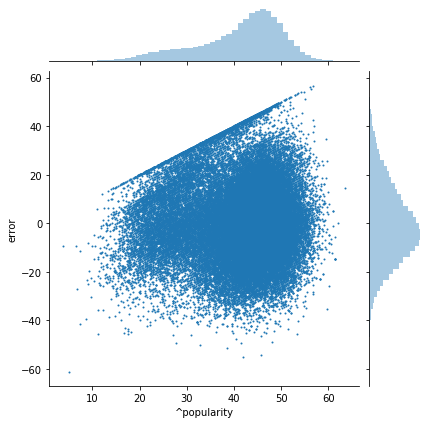

In [35]:
sns.jointplot(x = '^popularity', y = 'error', data = validation, s=1)

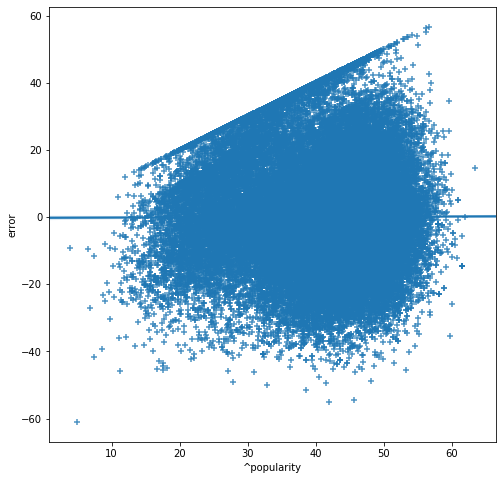

In [36]:
plt.figure(figsize=(8,8))
sns.regplot(x=validation['^popularity'],y=validation['error'], marker='+')

Based on resitual plot above, there's no clear pattern between error/residual to predicted popularit values. This means our model's residual passed the **linearity assumption**. Besides, we see that that residual are tended to form a normal distributions. If it's not enough from the plot above, let's use Saphiro or Kolmogorov Smirnov test. 

In [37]:
from scipy import stats
saphiro = stats.shapiro(validation['error'].values)
ks = stats.kstest(validation['error'].values, 'norm')
print(f"""Saphiro: {saphiro} \nkolmogorov smirnov: {ks}""")

Saphiro: (0.9915815591812134, 8.407790785948902e-44) 
kolmogorov smirnov: KstestResult(statistic=0.4650649654707291, pvalue=0.0)


C:\Users\dzul\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1660: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Because the data is more than 5000, and saphiro is not designed to test data with that number, just focus on the KS test. Look at the p-value, it's so small that the test score is rounded into 0.0. This indicate our model to pass the **normality assumption**

If we see the varianve of the residual

In [38]:
from statsmodels.stats.diagnostic import het_breuschpagan
_df = validation.drop(columns=['error', 'popularity', '^popularity']) #This line will drop non-numeric cols
bp_test = het_breuschpagan(error, _df.values )

In [39]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 16839.983021430155, 'LM-Test p-value': 0.0, 'F-Statistic': 2029.178309971371, 'F-Test p-value': 0.0}


based on the p-value < 0.05, our model is heteroscedastic. Hence it fail to pass the **heteroscadicity assumption**.

Collinearity is a condition where two feature or variable are highly correlated. We already inspect this by using `corr_matrix` on section 1. Multicollinearity, on the other hand, is not that simple because it measure multiple features. To calculate multicollinearity, we can use Variance Inflation Factor (VIF). 

[source](https://etav.github.io/python/vif_factor_python.html)

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(_df.values, i) for i in range(_df.shape[1])]
vif["features"] = _df.columns
vif

,VIF Factor,features
0,4.978634,acousticness
1,15.930826,danceability
2,5.153282,duration_ms
3,20.865751,energy
4,1.849934,instrumentalness
5,4.087629,key
6,3.162490,liveness
7,11.117661,loudness
8,2.939679,mode
9,2.330881,speechiness


By theory, if VIF  exceed the value of 10, then multicollinearity is highly present in our predictor. Based on the result, the model don't pass the **multicollinearity assumption**. `danceability`, `energry`, `loudness`, `time_signature`, and `tempo` might be removed in order to help the model's performance better. 

# Conclusion

The model's performance is quite bad. It passed 3 assumption but fail the heteroscedasticity one. Based on the eperiments, linear regression is not a proper model to predict popularity using supported data. 